In [72]:
# 1. Load Data

import pandas as pd
listings = pd.read_csv(r"C:\Users\meena\Downloads\Airbnb+Data\Airbnb Data\Listings.csv",encoding="ISO-8859-1",low_memory=False)
listings

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [63]:
 # Summary Statistics
print(listings.info())
print("--------------------------------------------------------------")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [14]:
 # 2. Clean and Filter Data

listings["host_since"] = pd.to_datetime(listings["host_since"])
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [19]:
 # 3. Summary Statistics
paris_listing =listings.query("city=='Paris'").loc[:,["host_since","neighbourhood","city","accommodates","price"]]
paris_listing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [20]:
paris_listing.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [22]:
paris_listing.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [23]:
paris_listing.query("accommodates==0 and price==0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [ ]:
 # 4. Grouped Aggregated Data

In [ ]:
# Average Price by Neighbourhood

paris_list_neighbour = (paris_listing.groupby("neighbourhood").agg({"price":"mean"}).sort_values("price"))
paris_list_neighbour.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [34]:
# Average Price by Accommodation (Elysee only)

paris_list_acc = (
    paris_listing.query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price":"mean"})
    .sort_values("price")
)
paris_list_acc.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [1]:
# Time-based Aggregation

paris_list_time = (
    paris_listing.set_index("host_since")
    .resample("YE")
    .agg({"neighbourhood":"count","price":"mean"})
)

paris_list_time.head()

SyntaxError: invalid syntax (2639975916.py, line 1)

In [ ]:
# 5. Visualizations using Seaborn & Matplotlib

In [2]:
# a. Average Price by Neighbourhood

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=paris_list_neighbour,
    x="price",
    y="neighbourhood",
    orient="h"
)
plt.title("Average Listing Price by Paris Neighbourhood")
plt.xlabel("Price Per Night (Euros)")
plt.ylabel("Neighbourhood")
sns.despine()
plt.tight_layout()
plt.show()


NameError: name 'paris_list_neighbour' is not defined

<Figure size 1000x600 with 0 Axes>

In [3]:
# b. Average Price by Accommodation Capacity (Elysee)import seaborn as sns

(paris_list_acc
.plot
.barh(
    title = "Average Listing Price by Accomodation Number",
    xlabel = "Price Per Night(Euros)",
    ylabel = "Accomodation Capacity",
    legend=None
)
)
sns.despine()

NameError: name 'paris_list_acc' is not defined

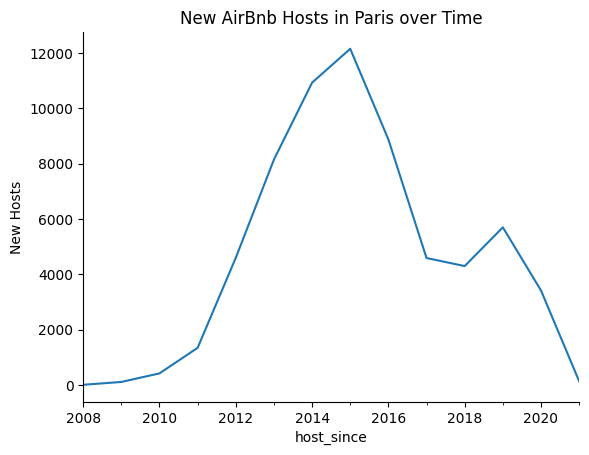

In [43]:
# c. Line Plot – New Hosts Over Time

paris_list_time["neighbourhood"].plot(
    ylabel="New Hosts",
    title = "New AirBnb Hosts in Paris over Time",
)
sns.despine()

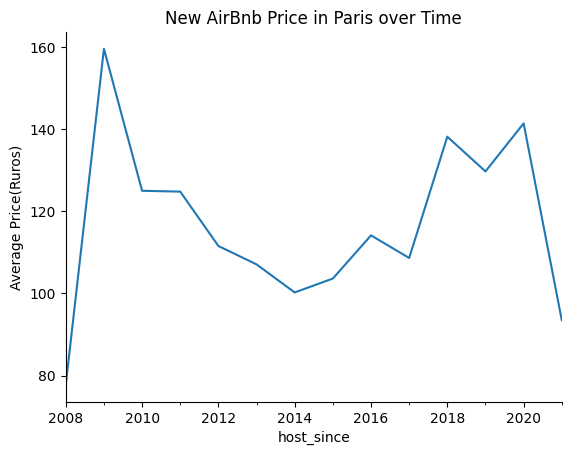

In [44]:
# d. Line Plot – Price Over Time

paris_list_time["price"].plot(
    ylabel="Average Price(Ruros)",
    title = "New AirBnb Price in Paris over Time",
)
sns.despine()

Text(0.5, 1.0, '2015 Regulations Lead to Fewer New Hosts, Higher Prices')

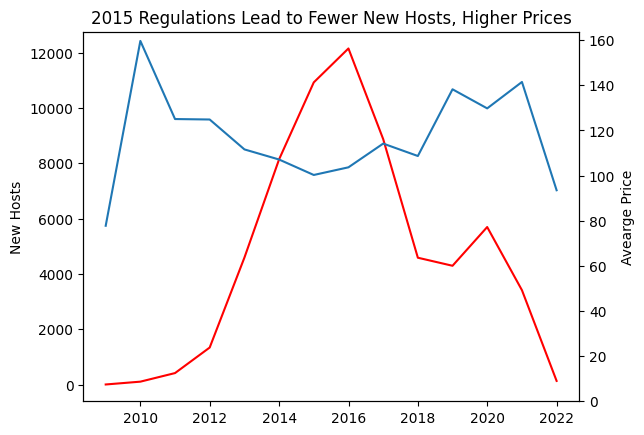

In [56]:
# e. Combined Line Plot – Hosts and Price Over Time

import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.plot(
    paris_list_time.index,paris_list_time["neighbourhood"],
    label ="New Hosts",
    c="red"
)
ax.set_ylabel("New Hosts")

ax2 = ax.twinx()

ax2.plot(
    paris_list_time.index,paris_list_time["price"],
    label ="Average Price"
)
ax2.set_ylim(0)
ax2.set_ylabel("Avearge Price")
ax.set_title("2015 Regulations Lead to Fewer New Hosts, Higher Prices")